<!-- Centered logo -->
<p align="center">
  <img src="https://github.com/erdogant/bnlearn/blob/master/docs/figs/logo.png?raw=true" width="300" />
</p>

<!-- Badges row (centered) -->
<p align="center">
  <a href="https://img.shields.io/pypi/pyversions/bnlearn"><img src="https://img.shields.io/pypi/pyversions/bnlearn" /></a>
  <a href="https://pypi.org/project/bnlearn/"><img src="https://img.shields.io/pypi/v/bnlearn" /></a>
  <img src="https://img.shields.io/github/stars/erdogant/bnlearn" />
  <a href="https://github.com/erdogant/bnlearn/blob/master/LICENSE"><img src="https://img.shields.io/badge/license-MIT-green.svg" /></a>
  <a href="https://github.com/erdogant/bnlearn/network"><img src="https://img.shields.io/github/forks/erdogant/bnlearn.svg" /></a>
  <a href="https://github.com/erdogant/bnlearn/issues"><img src="https://img.shields.io/github/issues/erdogant/bnlearn.svg" /></a>
  <a href="http://www.repostatus.org/#active"><img src="http://www.repostatus.org/badges/latest/active.svg" /></a>
  <a href="https://pepy.tech/project/bnlearn/"><img src="https://pepy.tech/badge/bnlearn/month" /></a>
  <a href="https://pepy.tech/project/bnlearn/"><img src="https://pepy.tech/badge/bnlearn" /></a>
  <a href="https://zenodo.org/badge/latestdoi/231263493"><img src="https://zenodo.org/badge/231263493.svg" /></a>
  <a href="https://erdogant.github.io/bnlearn/"><img src="https://img.shields.io/badge/Sphinx-Docs-Green" /></a>
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#medium-blog"><img src="https://img.shields.io/badge/Medium-Blog-black" /></a>
  <img src="https://img.shields.io/github/repo-size/erdogant/bnlearn" />
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#"><img src="https://img.shields.io/badge/Support%20this%20project-grey.svg?logo=github%20sponsors" /></a>
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#colab-notebook"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
</p>

---

# Bnlearn for Python

Welcome to the notebook of **bnlearn**. bnlearn is Python package for learning the graphical structure of Bayesian networks, parameter learning, inference and sampling methods. Because probabilistic graphical models can be difficult in usage, Bnlearn for python (this package) is build on the pgmpy package and contains the most-wanted pipelines. Navigate to API documentations for more detailed information.

The core functionalities are:
<br>
<b>* Causal Discovery</b>
<br>
<b>* Structure Learning</b>
<br>
<b>* Parameter Learning</b>
<br>
<b>* Inferences using do-calculus</b>
<br>
<br>

---

### Find details in the Medium blogs.


<style>
.card-container {
  display: flex;
  flex-wrap: wrap;
  gap: 16px;
  justify-content: center;
  margin-top: 20px;
}

.card {
  flex: 1 1 300px;
  max-width: 300px;
  background: #f9f9f9;
  border: 1px solid #ddd;
  border-radius: 12px;
  padding: 16px;
  box-shadow: 2px 2px 10px rgba(0,0,0,0.05);
  transition: 0.3s;
}

.card:hover {
  transform: scale(1.02);
  box-shadow: 4px 4px 20px rgba(0,0,0,0.1);
}

.card a {
  text-decoration: none;
  font-weight: bold;
  color: #333;
  font-size: 16px;
}

.card a:hover {
  color: #1e90ff;
}
</style>

<div class="card-container">
  <div class="card">
    <a href="https://medium.com/data-science-collective/the-starters-guide-to-causal-structure-learning-with-bayesian-methods-in-python-e3b90f49c99c" target="_blank">
      1. The Starters Guide to Causal Structure Learning with Bayesian Methods in Python.
    </a>
  </div>
  <div class="card">
    <a href="https://medium.com/data-science-collective/why-prediction-isnt-enough-using-bayesian-models-to-change-the-outcome-5c9cf9f65a75" target="_blank">
      2. Why Prediction Isn’t Enough: Using Bayesian Models to Change the Outcome.
    </a>
  </div>
  <div class="card">
    <a href="https://medium.com/data-science-collective/synthetic-data-the-essentials-of-data-generation-using-bayesian-sampling-6d072e97e09d" target="_blank">
      3. Synthetic Data: The Essentials Of Data Generation Using Bayesian Sampling.
    </a>
  </div>
</div>



---

### Support
This library is for <b>free</b> but it runs on coffee! :)

You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/bnlearn/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/bnlearn).

<table>
  <tr>
    <td style="text-align: center;">
      <a href="https://www.buymeacoffee.com/erdogant">
        <img src="https://img.buymeacoffee.com/button-api/?text=Buy me a coffee&emoji=&slug=erdogant&button_colour=FFDD00&font_colour=000000&font_family=Cookie&outline_colour=000000&coffee_colour=ffffff" />
      </a>
    </td>
    <td style="text-align: center;">
      <a href="https://erdogant.medium.com/subscribe" target="_blank">
        <img height="50" style="border:0px;height:36px;" src="https://erdogant.github.io/images/medium_follow_me.jpg" border="0" alt="Follow me on Medium" />
      </a>
    </td>
  </tr>
</table>

---


**Installation of libraries**

In [23]:
# Install bnlearn
!pip install -U bnlearn

# Install d3blocks
!pip install d3blocks

# Install from github source
#!pip install -U git+https://github.com/erdogant/bnlearn

In [24]:
# Version matplotlib should be >= 3.3.4
import matplotlib
print(matplotlib.__version__)

import pandas as pd
import numpy as np

# Version pgmpy should be >= 0.1.13
import pgmpy
print(pgmpy.__version__)

# Latest version bnlearn
import bnlearn as bn
print(bn.__version__)

3.10.0
0.1.25
0.12.0


**Structure learning example**

In [25]:
# Example dataframe sprinkler_data.csv can be loaded with:
df = bn.import_example()
# df = pd.read_csv('sprinkler_data.csv')
model = bn.structure_learning.fit(df)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[20-09-2025 19:08:05] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:08:05] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:08:05] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.
[20-09-2025 19:08:05] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


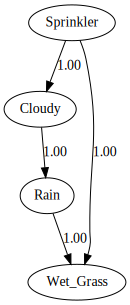

In [26]:
#G = bn.plot(model)
bn.plot_graphviz(model)


In [27]:
# Set some colors to the edges and nodes
node_properties = bn.get_node_properties(model)
node_properties['Sprinkler']['node_color']='#FF0000'

edge_properties = bn.get_edge_properties(model)

edge_properties[('Cloudy', 'Rain')]['color']='#FF0000'
edge_properties[('Cloudy', 'Rain')]['weight']=5

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


In [28]:
G = bn.plot(model,
            node_properties=node_properties,
            edge_properties=edge_properties,
            interactive=True,
            params_interactive={'notebook':True})

INFO:d3blocks.d3blocks:Cleaning edge_properties and config parameters..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Slider range is set to [0, 5]
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] File already exists and will be ov

[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:05] [d3graph.d3graph] [INFO] Slider range is set to [0, 5]
[20-09-2025 19:08:06] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[20-09-2025 19:08:06] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]


**Various methodtypes and scoringtypes**

In [29]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='cl', root_node='Cloudy')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


Parameter Learning

In [30]:
# Import dataframe
df = bn.import_example()
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('sprinkler', CPD=False)
# Now we learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df)
# Make plot
#G = bn.plot(model_update)
G = bn.plot(model_update,
            interactive=True,
            params_interactive={'notebook':True, 'cdn_resources': 'remote'})


[bnlearn] >Import <sprinkler>
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518

INFO:d3blocks.d3blocks:Cleaning edge_properties and config parameters..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Slider range is set to [0, 1]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Display in notebook using IPython.


[20-09-2025 19:08:11] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] Slider range is set to [0, 1]
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[20-09-2025 19:08:12] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]


**Inferences**

In [31]:
model = bn.import_DAG('sprinkler')
q_1 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1,'Sprinkler':0, 'Wet_Grass':1})
q_2 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1})

[bnlearn] >Import <sprinkler>
[bnlearn] >[CPD > Validate] >[Node Cloudy] >OK
[bnlearn] >[CPD > Validate] >[Node Sprinkler] >OK
[bnlearn] >[CPD > Validate] >[Node Rain] >OK
[bnlearn] >[CPD > Validate] >[Node Wet_Grass] >OK
[bnlearn] >Variable Elimination.
+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 |   0 |
+----+--------+-----+
|  1 |      1 |   1 |
+----+--------+-----+

Summary for variables: ['Rain']
Given evidence: Cloudy=1, Sprinkler=0, Wet_Grass=1

Rain outcomes:
- Rain: 0 (0.0%)
- Rain: 1 (100.0%)
[bnlearn] >Variable Elimination.
+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 | 0.2 |
+----+--------+-----+
|  1 |      1 | 0.8 |
+----+--------+-----+

Summary for variables: ['Rain']
Given evidence: Cloudy=1

Rain outcomes:
- Rain: 0 (20.0%)
- Rain: 1 (80.0%)


In [32]:
print(dir(q_2))
print(q_2.df)

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__truediv__', '__weakref__', '_str', 'add_state_names', 'assignment', 'cardinality', 'copy', 'del_state_names', 'df', 'divide', 'get_cardinality', 'get_state_names', 'get_state_no', 'get_value', 'identity_factor', 'is_valid_cpd', 'marginalize', 'maximize', 'name_to_no', 'no_to_name', 'normalize', 'product', 'reduce', 'sample', 'scope', 'set_value', 'state_names', 'store_state_names', 'sum', 'text', 'values', 'variables']
   Rain    p
0     0  0.2
1     1  0.8


**Sampling**

In [33]:
model = bn.import_DAG('sprinkler')
df = bn.sampling(model, n=1000)

[bnlearn] >Import <sprinkler>
[bnlearn] >[CPD > Validate] >[Node Cloudy] >OK
[bnlearn] >[CPD > Validate] >[Node Sprinkler] >OK
[bnlearn] >[CPD > Validate] >[Node Rain] >OK
[bnlearn] >[CPD > Validate] >[Node Wet_Grass] >OK


**Comparing networks**

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </usr/local/lib/python3.12/dist-packages/datazets/data/asia.bif>


[20-09-2025 19:09:22] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:09:22] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:09:22] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.
[20-09-2025 19:09:22] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


[bnlearn] >[CPD > Validate] >[Node asia] >OK
[bnlearn] >[CPD > Validate] >[Node bronc] >OK
[bnlearn] >[CPD > Validate] >[Node dysp] >OK
[bnlearn] >[CPD > Validate] >[Node either] >OK
[bnlearn] >[CPD > Validate] >[Node lung] >OK
[bnlearn] >[CPD > Validate] >[Node smoke] >OK
[bnlearn] >[CPD > Validate] >[Node tub] >OK
[bnlearn] >[CPD > Validate] >[Node xray] >OK


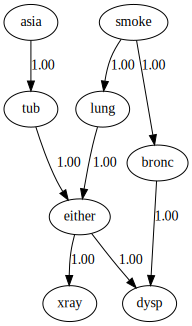

In [46]:
# Load asia DAG
model = bn.import_DAG('asia')

# plot ground truth
# G = bn.plot(model, interactive=False)
bn.plot_graphviz(model)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


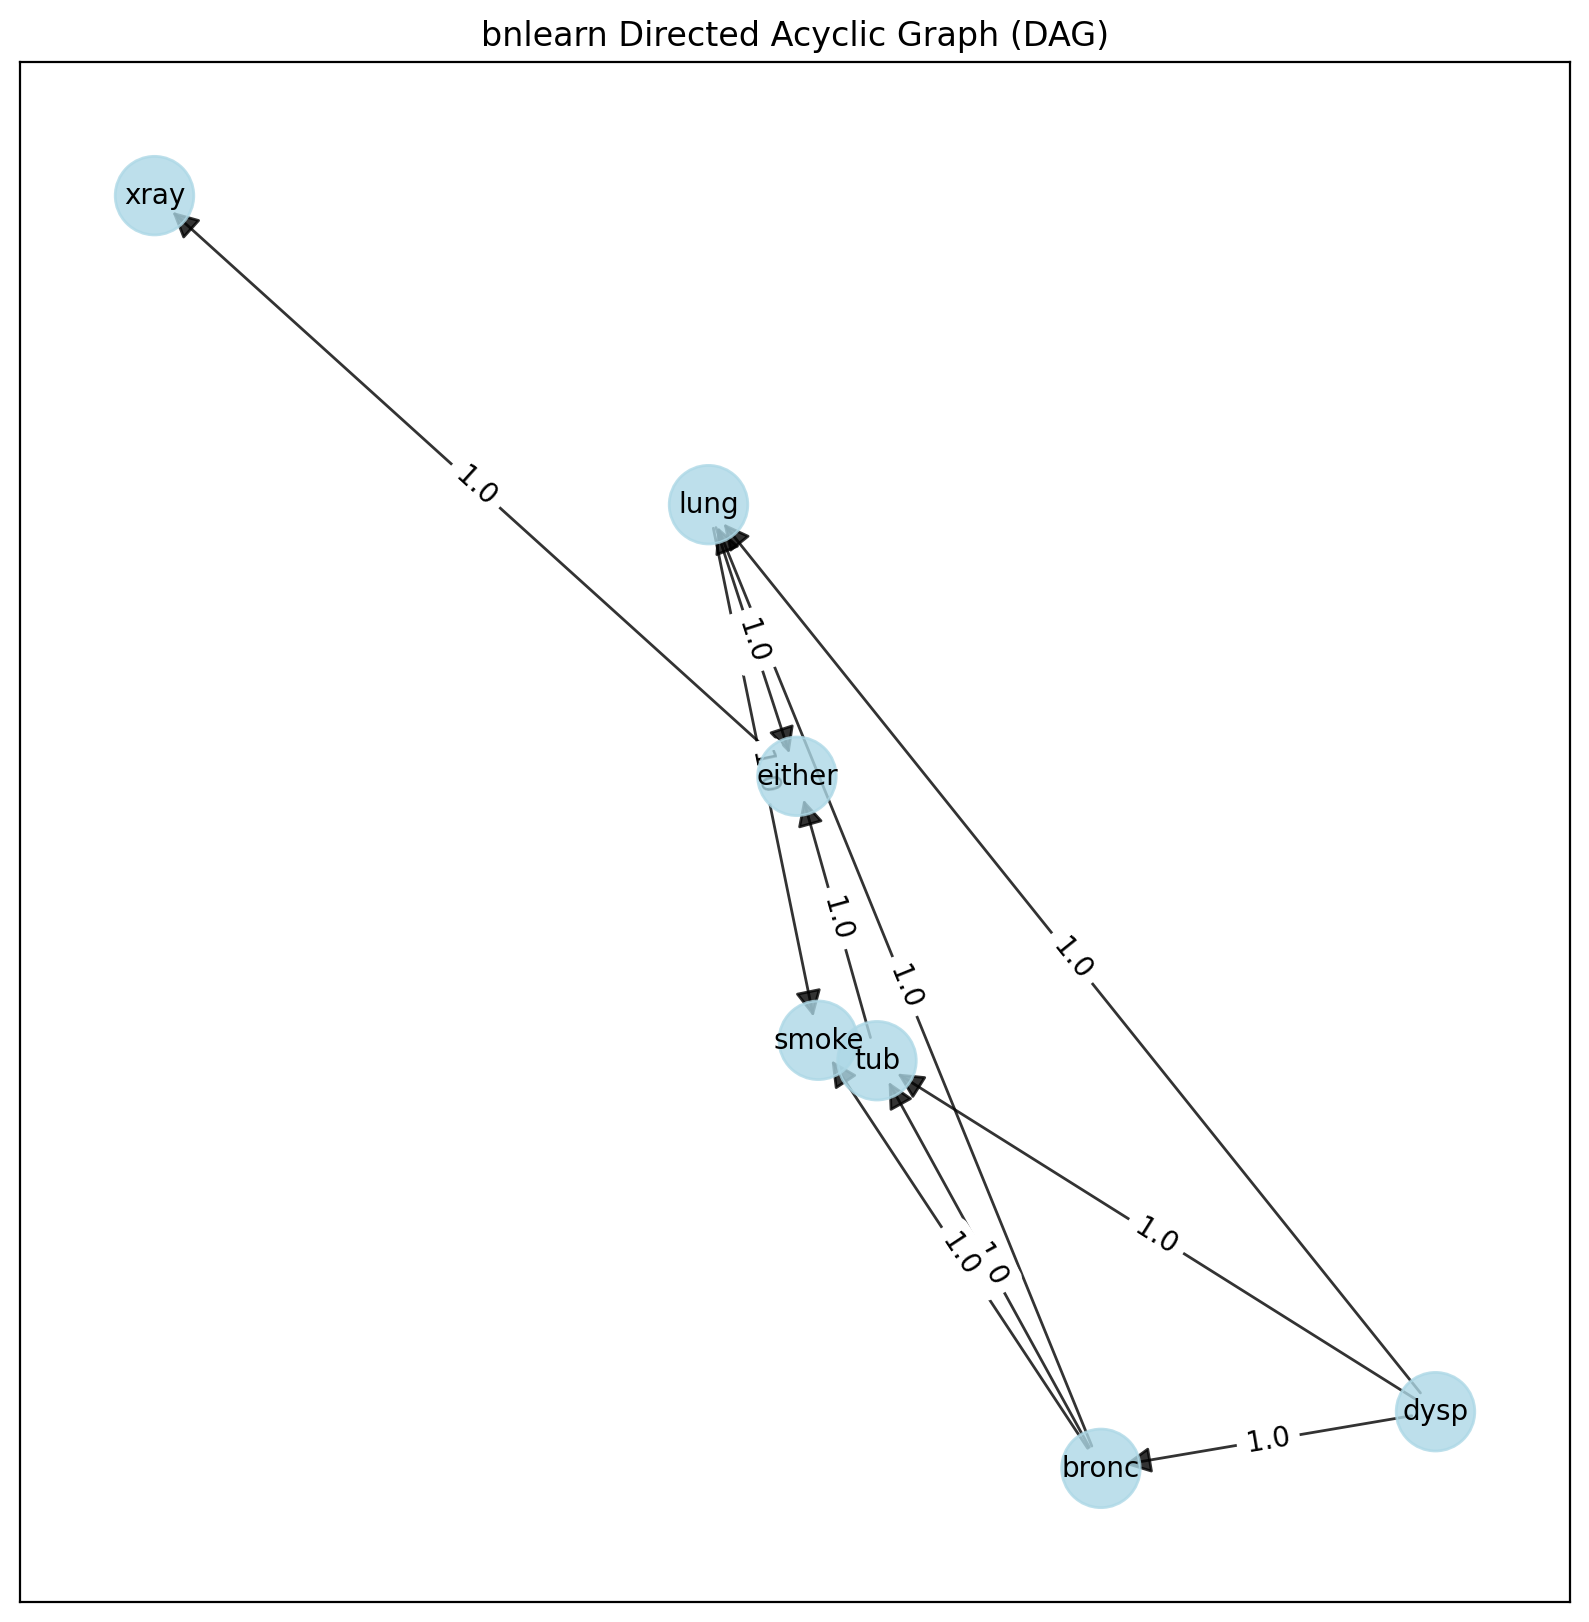

[bnlearn] >Existing coordinates from <pos> are used.


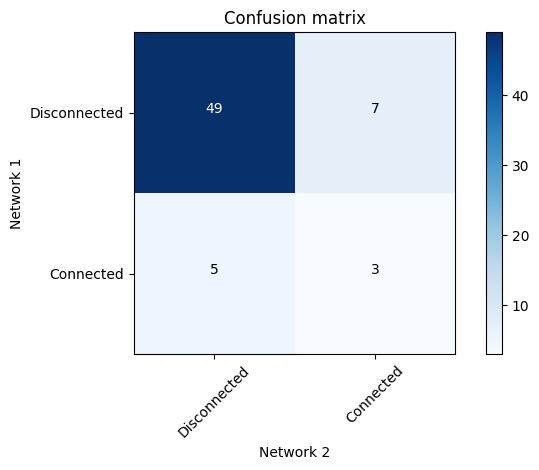

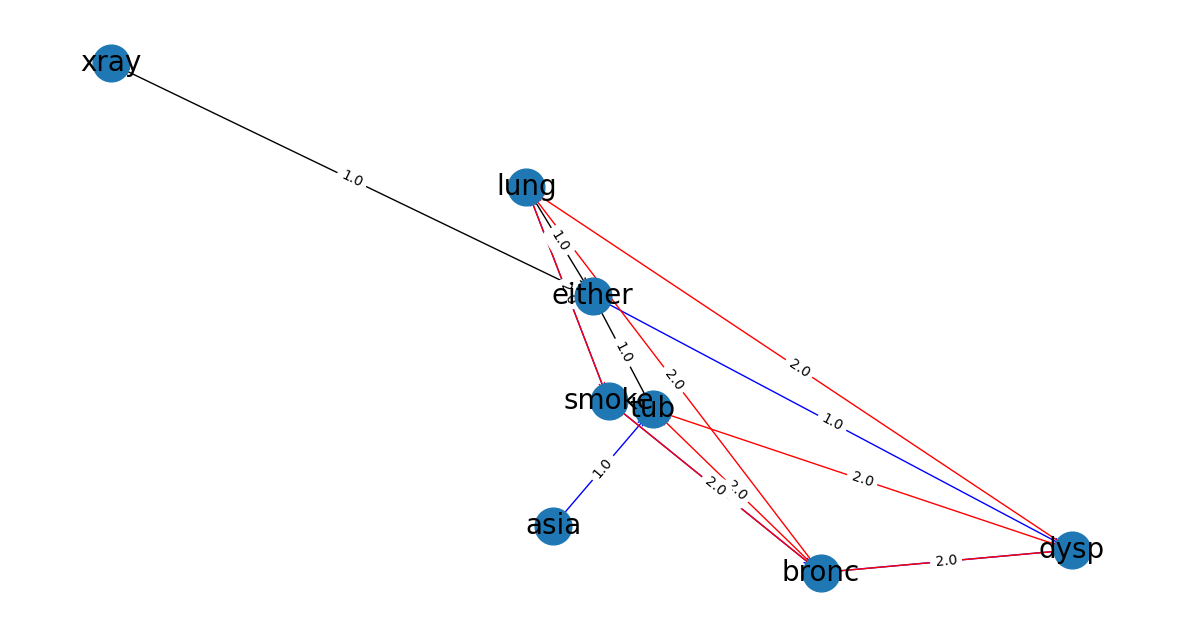

(array([[49,  7],
        [ 5,  3]]),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     0
 smoke      0    0      0    -1     -1       0     0     0
 lung       0    0      2     0      0       1     0     0
 bronc      0    2      2     2      0       0     0    -1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    2      0     2      2       0     0     0)

In [45]:
# Sampling
df = bn.sampling(model, n=10000)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])

# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

**Loading example DAG files**

Note that some of the CPDs do not add up to exactly 1. This will raise an error that needs to be fixed in the input file. As an example, the **asia** works correctly but when you try **pathfinder** throws the error: "*>Warning: CPD [Fault] does not add up to 1 but is: 1.00000003*". You need to make sure that it exactly sums up to 1.

In [35]:
bif_file= 'sprinkler'
bif_file= 'alarm'
bif_file= 'andes'
bif_file= 'asia'
#bif_file= 'pathfinder'
#bif_file= 'sachs'
#bif_file= 'miserables'
#bif_file= 'filepath/to/model.bif'

# Loading example dataset
model = bn.import_DAG(bif_file, verbose=1)



---



---



### Example to learn structure in dataset that start with source-target and the weights.

The weights can be counts how often two edges were detected.

In [36]:
raw = bn.import_example('stormofswords')
# Convert raw data into sparse datamatrix
df = bn.vec2df(raw['source'], raw['target'], raw['weight'])


In [37]:
print(df.head())

   Aegon  Aemon  Aerys  Alliser  Amory  Anguy   Arya  Balon  Barristan  \
0  False   True  False    False  False  False  False  False      False   
1  False   True  False    False  False  False  False  False      False   
2  False   True  False    False  False  False  False  False      False   
3  False   True  False    False  False  False  False  False      False   
4  False   True  False    False  False  False  False  False      False   

   Belwas  ...  Tommen  Tyrion  Tywin    Val  Varys  Viserys  Walder  Walton  \
0   False  ...   False   False  False  False  False    False   False   False   
1   False  ...   False   False  False  False  False    False   False   False   
2   False  ...   False   False  False  False  False    False   False   False   
3   False  ...   False   False  False  False  False    False   False   False   
4   False  ...   False   False  False  False  False    False   False   False   

    Worm  Ygritte  
0  False    False  
1  False    False  
2  False    Fa

In [38]:
# Make the actual Bayesian DAG
DAG = bn.make_DAG(list(zip(raw['source'], raw['target'])), verbose=0)
# Make plot
G=bn.plot(DAG,
          interactive=True,
          params_interactive={'notebook':True, 'cdn_resources': 'remote', 'filter_menu': True, 'select_menu': True})

# You will see that this is a huge network with hundreds of edges.

INFO:d3blocks.d3blocks:Cleaning edge_properties and config parameters..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Keep only edges with weight>0


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Slider range is set to [0, 1]
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:37] [d3graph.d3graph] [INFO] Display in notebook using IPython.


[20-09-2025 19:08:38] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:38] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:38] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:38] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:42] [d3graph.d3graph] [INFO] Slider range is set to [0, 1]
[20-09-2025 19:08:42] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[20-09-2025 19:08:42] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]


In [39]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, df, verbose=3)
# All the CPDs are now learned

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[bnlearn] >CPD of Grenn:
+--------------+-----+----------------+---------------+
| Aemon        | ... | Aemon(True)    | Aemon(True)   |
+--------------+-----+----------------+---------------+
| Eddison      | ... | Eddison(True)  | Eddison(True) |
+--------------+-----+----------------+---------------+
| Jon          | ... | Jon(True)      | Jon(True)     |
+--------------+-----+----------------+---------------+
| Samwell      | ... | Samwell(False) | Samwell(True) |
+--------------+-----+----------------+---------------+
| Grenn(False) | ... | 0.5            | 0.5           |
+--------------+-----+----------------+---------------+
| Grenn(True)  | ... | 0.5            | 0.5           |
+--------------+-----+----------------+---------------+
[bnlearn] >CPD of Samwell:
+----------------+-----+------------------+
| Aemon          | ... | Aemon(True)      |
+----------------+-----+------------------+
| Bran           | ... | Bran(True)       |
+----------------+-----+------------------+


In [40]:
# Generate some data based on DAG
# df1 = bn.sampling(model, n=1000)
# Make predictions
# print(query)
query = bn.inference.fit(DAG, variables=['Grenn'], evidence={'Aemon': 1, 'Samwell': 1})
print(query)
query.df

[bnlearn] >Variable Elimination.
+----+---------+----------+
|    | Grenn   |        p |
+====+=========+==========+
|  0 | False   | 0.578207 |
+----+---------+----------+
|  1 | True    | 0.421793 |
+----+---------+----------+

Summary for variables: ['Grenn']
Given evidence: Aemon=1, Samwell=1

Grenn outcomes:
- Grenn: False (57.8%)
- Grenn: True (42.2%)
+--------------+--------------+
| Grenn        |   phi(Grenn) |
+==============+==============+
| Grenn(False) |       0.5782 |
+--------------+--------------+
| Grenn(True)  |       0.4218 |
+--------------+--------------+


,Grenn,p
0,False,0.578207
1,True,0.421793


In [41]:
# Structure learning on such a huge network will take a lot of time, and with some methods it may even be impossible to compute.
# Lets try to learn it structure for a smaller subset of the columns.
DAG_learned = bn.structure_learning.fit(df.iloc[:, 0:20])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [42]:
# Keep only significant edges
DAG_learned = bn.independence_test(DAG_learned, df, prune=True)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >1 edges are removed with P-value > 0.05 based on chi_square
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..


In [43]:
# Plot the edges for the small network
_ = bn.plot(DAG_learned,
            interactive=True,
            params_interactive={'notebook':True, 'cdn_resources': 'remote', 'filter_menu': True, 'select_menu': True})

INFO:d3blocks.d3blocks:Cleaning edge_properties and config parameters..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Slider range is set to [0, 5]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.


[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/d3graph.html]
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Display in notebook using IPython.


[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-09-2025 19:08:59] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-09-2025 19:09:00] [d3graph.d3graph] [INFO] Slider range is set to [0, 5]
[20-09-2025 19:09:00] [d3graph.d3graph] [INFO] Write to path: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[20-09-2025 19:09:00] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/tmp/d3graph/bnlearn_Directed_Acyclic_Graph_(DAG).html]


**Fin notebook**

### Support
This library is for free but it runs on coffee! :)

You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/bnlearn/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/bnlearn).

<table>
  <tr>
    <td style="text-align: center;">
      <a href="https://www.buymeacoffee.com/erdogant">
        <img src="https://img.buymeacoffee.com/button-api/?text=Buy me a coffee&emoji=&slug=erdogant&button_colour=FFDD00&font_colour=000000&font_family=Cookie&outline_colour=000000&coffee_colour=ffffff" />
      </a>
    </td>
    <td style="text-align: center;">
      <a href="https://erdogant.medium.com/subscribe" target="_blank">
        <img height="50" style="border:0px;height:36px;" src="https://erdogant.github.io/images/medium_follow_me.jpg" border="0" alt="Follow me on Medium" />
      </a>
    </td>
  </tr>
</table>

---
